## Final Project Submission

Please fill out:
* Student name: Nagib Gonzalez
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


## Overview

For this project we will be working with Microsoft to help them create original video content. We will be working with various datasets to see what insights we can get from the films that are doing the best in the box office. To measure success of the films we will be looking into the return on investment and profitability.

 ## Business Problem

Microsoft is looking to venture into the movie producing business. I will be helping Microsoft by diving into movie data from various sources and giving recommendations based on my observations. 

The first question that we would like to ask is what  type of movie genres should we focus on making? 

The second question that we would like to ask is what should our budget be for the films? 

The third question that we would like to ask is what should our expected return be given our budget. Lets begin with looking at the different datasets that we have that will help us answer our questions. 

## Data.


We will be working with data from two sources.

the Internet Movie Data Base (IMDB):

IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows. The table that I used in this  database was the movie basics which contained the movie titles and genres. 

The Numbers:

The Numbers provides detailed movie financial analysis, including box office, DVD and Blu-ray sales reports, and release schedules.  This data set provides the financial data that we will be working with including production budget and worldwide gross. From this data set we were able to find the ROI percentage and profit.


In [1]:
#importing libraries

import numpy as np
import sqlite3
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Lets get the datasets that we will be working with. The first dataset is a SQL database so lets connect to the database.


In [2]:

conn = sqlite3.connect('zippedData/im.db')

Lets name our database df for now and see what different tables our in our data.

In [3]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The tables that will be most relevant for our analysis are movie_basics and movie_ratings. so lets take closer look at them.

In [4]:
pd.read_sql("""
SELECT *
FROM movie_basics;
""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
pd.read_sql("""
SELECT *
FROM movie_ratings;
""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Now that we have an understanding of what columns are in the two tables lets do a left join on our tables and rearrange our data so that the movies with the most votes are in descending order. We will also be calling our new dataframe Super_df.

In [6]:
q = """
SELECT *
FROM movie_ratings
LEFT JOIN movie_basics
USING(movie_id)
    
    
    ORDER BY numvotes DESC;
"""
Super_df = pd.read_sql(q,conn)
Super_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"


In [7]:
Super_df.shape

(73856, 8)

In [8]:
#Stripping primary_title column spaces ahead and after title
Super_df['original_title'].str.strip()
Super_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"


In [9]:
#Stipping and replacing puctuation so dataframes have better matching
Super_df['original_title'].replace('[$,/:.!?]','', regex=True, inplace=True)
Super_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"


Next we will be importing our financial data set and looking at the head of our data

In [10]:
df2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Lets rename the movie column so that we can join our Super_df with the financial dataset (df2). This new dataset will be named joined_df.

In [11]:

df2.rename(columns={"movie":"original_title"},inplace=True)

In [12]:
#Stripping primary_title column spaces ahead and after title
df2['original_title'].str.strip()
df2.head()

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#Stipping and replacing puctuation so dataframes have better matching
df2['original_title'].replace('[$,/:.!?]','', regex=True, inplace=True)
df2.head()

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep VIII The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
joined_df = pd.merge(df2,Super_df, how='inner',on='original_title')
joined_df.head()

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,6.6,447624,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,6.0,24451,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,7.3,665594,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,6.5,329135,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [15]:
joined_df.shape

(2678, 13)

In [16]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2678 non-null   int64  
 1   release_date       2678 non-null   object 
 2   original_title     2678 non-null   object 
 3   production_budget  2678 non-null   object 
 4   domestic_gross     2678 non-null   object 
 5   worldwide_gross    2678 non-null   object 
 6   movie_id           2678 non-null   object 
 7   averagerating      2678 non-null   float64
 8   numvotes           2678 non-null   int64  
 9   primary_title      2678 non-null   object 
 10  start_year         2678 non-null   int64  
 11  runtime_minutes    2570 non-null   float64
 12  genres             2672 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 292.9+ KB



Lets do some data cleaning and drop the columns which we will not be needing. the columnns we will be dropping are primary_title and id. We also need to change the financial data to be numbers not strings aswell as making the release date a datetime oject.

In [17]:
joined_df.drop(columns=['primary_title','id'],axis=1,inplace=True)

In [18]:
joined_df['production_budget'] = joined_df['production_budget'].str.replace(',','').str.replace('$','').astype(int)

In [19]:
joined_df['domestic_gross'] = joined_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(int)

In [20]:
joined_df['worldwide_gross'] = joined_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

In [21]:
joined_df['release_date']= pd.to_datetime(joined_df['release_date'])
 

In [22]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2678 non-null   datetime64[ns]
 1   original_title     2678 non-null   object        
 2   production_budget  2678 non-null   int64         
 3   domestic_gross     2678 non-null   int64         
 4   worldwide_gross    2678 non-null   int64         
 5   movie_id           2678 non-null   object        
 6   averagerating      2678 non-null   float64       
 7   numvotes           2678 non-null   int64         
 8   start_year         2678 non-null   int64         
 9   runtime_minutes    2570 non-null   float64       
 10  genres             2672 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 251.1+ KB


In [23]:
joined_df.head()

,release_date,original_title,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,start_year,runtime_minutes,genres
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy"
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi"
2,2015-05-01,Avengers Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,665594,2015,141.0,"Action,Adventure,Sci-Fi"
3,2018-04-27,Avengers Infinity War,300000000,678815482,2048134200,tt4154756,8.5,670926,2018,149.0,"Action,Adventure,Sci-Fi"
4,2017-11-17,Justice League,300000000,229024295,655945209,tt0974015,6.5,329135,2017,120.0,"Action,Adventure,Fantasy"


In [24]:
#dropping duplicates
joined_df.drop_duplicates(subset='original_title',inplace=True)

Now lets we want to look at which genre we should make. The current column has several genres per film so lets explode the genre column in order to seperate them and then drop the genre column.

In [25]:
joined_df['genre'] =joined_df['genres'].str.split(',')
joined_df = joined_df.explode('genre')


In [26]:
pd.set_option('display.max_columns', None)

In [27]:

joined_df.head()

,release_date,original_title,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,start_year,runtime_minutes,genres,genre
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Action
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Adventure
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Fantasy
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi",Action
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi",Adventure


In [28]:
len(joined_df.loc[joined_df['worldwide_gross'] == 0])

406

In [29]:
#how many values are equal to 0
len(joined_df.loc[joined_df['production_budget'] == 0])

0

In [30]:
#Dropping 0 values
joined_df = joined_df[joined_df['worldwide_gross'] != 0]

In [31]:
#Did that work
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 0 to 2675
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4690 non-null   datetime64[ns]
 1   original_title     4690 non-null   object        
 2   production_budget  4690 non-null   int64         
 3   domestic_gross     4690 non-null   int64         
 4   worldwide_gross    4690 non-null   int64         
 5   movie_id           4690 non-null   object        
 6   averagerating      4690 non-null   float64       
 7   numvotes           4690 non-null   int64         
 8   start_year         4690 non-null   int64         
 9   runtime_minutes    4643 non-null   float64       
 10  genres             4690 non-null   object        
 11  genre              4690 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 476.3+ KB


In [32]:
#We would like to see percent ROI, creating a column that shows worldwide gross / production budget  
joined_df['Percent ROI'] = joined_df['worldwide_gross'] / joined_df['production_budget'] *100
joined_df.head()

,release_date,original_title,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,start_year,runtime_minutes,genres,genre,Percent ROI
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Action,254.667286
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Adventure,254.667286
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Fantasy,254.667286
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi",Action,42.789243
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi",Adventure,42.789243


In [33]:
#Creating new df with just Genre and Percent ROI
genre_ROI_df = joined_df[['genre', 'Percent ROI']]
genre_ROI_df.head(10)

,genre,Percent ROI
0,Action,254.667286
0,Adventure,254.667286
0,Fantasy,254.667286
1,Action,42.789243
1,Adventure,42.789243
1,Sci-Fi,42.789243
2,Action,424.384139
2,Adventure,424.384139
2,Sci-Fi,424.384139
3,Action,682.711400


In [34]:
#Grouping df by Genre and median Percent ROI based on the given genre
genre_group = genre_ROI_df.groupby('genre').median()
top_genre_ROIs = genre_group.sort_values('Percent ROI', ascending=False).head(10)

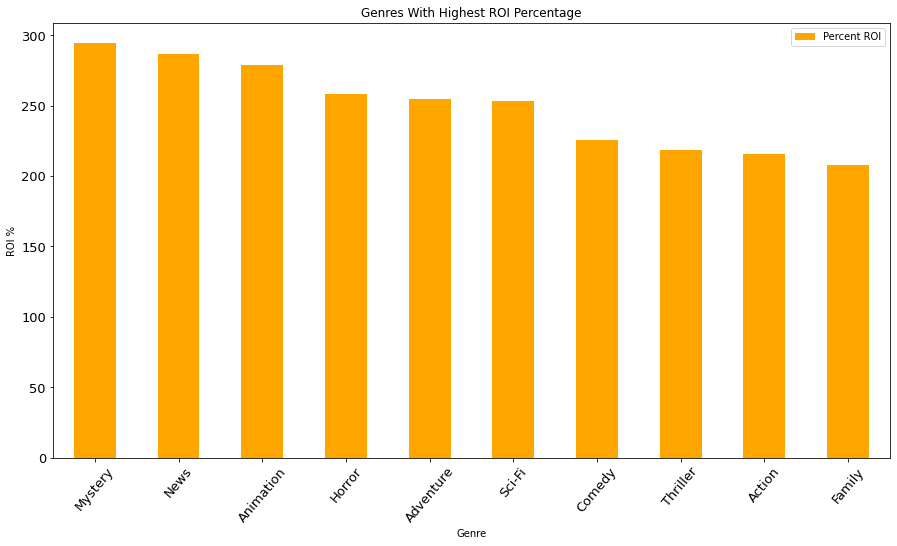

In [92]:
# Plotting. Genres with. the highest roi


(top_genre_ROIs
 .plot(kind='bar', 
       figsize=(15,8), 
       title='Genres With Highest ROI Percentage', 
       xlabel='Genre',
       ylabel='ROI %',
       rot=50, 
       fontsize=13,
      color='orange'));

In [79]:
#lets also look at the most profitable genres in terms of dollar amount by crreatinng a new
#columnn
joined_df['Profit'] = joined_df['worldwide_gross'] - joined_df['production_budget']
joined_df.head()

,release_date,original_title,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,numvotes,start_year,runtime_minutes,genres,genre,Percent ROI,ROI$,Profit
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Action,254.667286,635063875,635063875
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Adventure,254.667286,635063875,635063875
0,2011-05-20,Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,447624,2011,136.0,"Action,Adventure,Fantasy",Fantasy,254.667286,635063875,635063875
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi",Action,42.789243,-200237650,-200237650
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,24451,2019,113.0,"Action,Adventure,Sci-Fi",Adventure,42.789243,-200237650,-200237650


In [80]:
#datat frame with just genre and profit
profit_df = joined_df[['genre', 'Profit']]
profit_df.head()

,genre,Profit
0,Action,635063875
0,Adventure,635063875
0,Fantasy,635063875
1,Action,-200237650
1,Adventure,-200237650


In [86]:
#Grouping df by Genre and median profit based on the given genre
genre_group2 = profit_df.groupby('genre').median()
top_genre_ROI_dollar = genre_group2.sort_values('Profit', ascending=False).head(10)

<ipython-input-84-31886153474e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


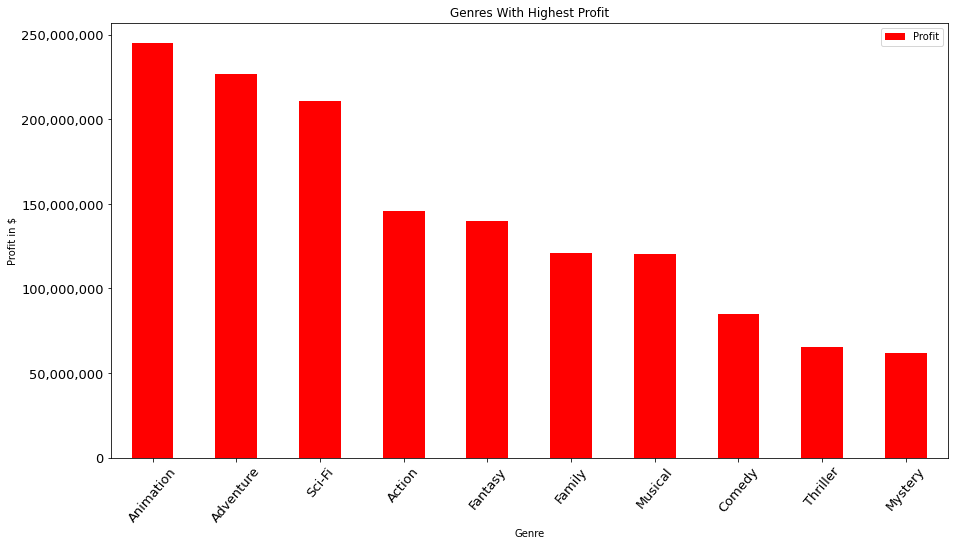

In [84]:
(top_genre_ROI_dollar
 .plot(kind='bar', 
       figsize=(15,8), 
       title='Genres With Highest Profit', 
       xlabel='Genre',
       ylabel='Profit in $',
       rot=50, 
       fontsize=13,
      color='red'
     ));
#removing scientific notation
plt.ticklabel_format(style='plain', axis='y')
# formatting label to have commas
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


lets look at the relationship with production buddget and genre

In [36]:
#creating a new df

budget_roi = joined_df[['genre', 'Percent ROI','production_budget']]

<ipython-input-88-8cc338c31e06>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


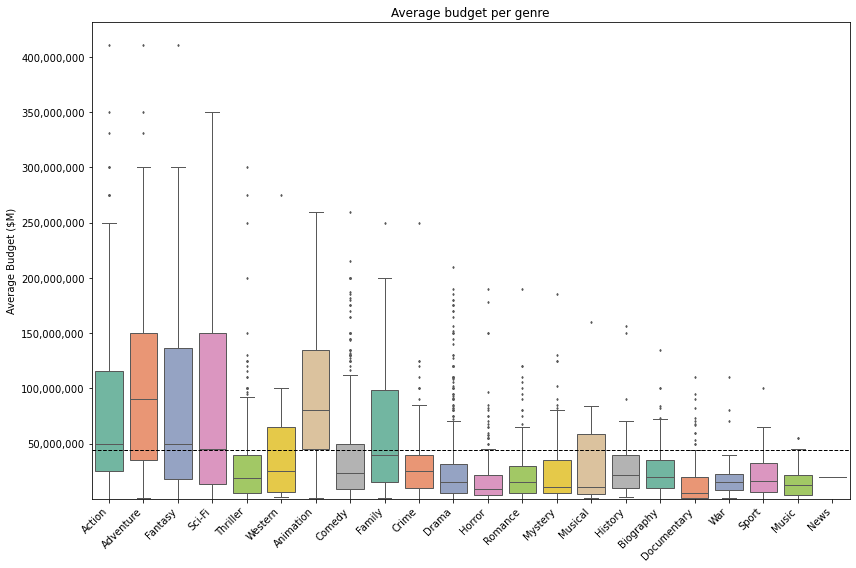

In [88]:

fig = plt.figure(figsize = (12, 8))

# fliersize is the size of outlier markers
g = sns.boxplot(x = 'genre', y = 'production_budget', data = budget_roi, 
                palette="Set2", linewidth = 1, fliersize= 1.5)

g.set(title = 'Average budget per genre', 
      ylabel = "Average Budget ($M)", xlabel = "",)

# put a horizontal line on overall mean
plt.axhline(budget_roi.production_budget.mean(), ls='--', lw = 1, color = 'black')
plt.ylim(20000)
plt.xticks(rotation=45, ha='right')
#removing scientific notation
plt.ticklabel_format(style='plain', axis='y')
# formatting label to have commas
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.tight_layout()
#fig.savefig("filename.png")

plt.show()

## Conclusion

  In the first visualization, we looked at return on investment. The formula for that is( ROI = World Wide Gross/ Production Budget x 100). We saw that the Mystery genre had the highest return with 300% ROI followed by News and Animation which were about 275% ROI. The second visualization looked at the highest profiting genres. the formula we used for that was World Wide Gross subtracted by the production budget. The highest profiting genres were Animation, Adventure, and Sci-Fi. Those genres profited between 200 and 250 million dollars. The Mystery genre profited close to 75 million dollars while the News genre did not make it on our top ten list. After observing these two charts and to answer our first question on which genres we should make I would suggest that the genres which should focus on making are Animation, Adventure, and Sci-Fi. These genres have an ROI above 250% and a profit of over 200 million dollars. Although the Mystery genre had the highest ROI in terms of percentage, the profit margins were about 125 million dollars less than Animation, Adventure, or Sci-Fi. 

   The third visualization looked at the average Budget per genre. The average budget for all genres was about 50 million dollars. The median amount for Adventure and Animation was closer to 100 million dollars while the Sci-Fi median was closer to 50 million. For the adventure budget, it is interesting to see that there were outliers that were over 300 million dollars. To answer our second question about our movie budget I would recommend spending anywhere from 75 to 150 million if we make an Animation or Adventure film. If we decide to make a Sci-Fi film I would suggest that you can spend less starting at 50 million dollars and try not to spend over 150 million.
   
   To answer our third question on what our expected return should be I believe that it would make sense to have a portfolio of three movies with the genres that were recommended Animation, Adventure, and Sci-Fi. I would suggest we spend a maximum of 150 million per movie totaling 450 million for all thre movies. on that 450 million dollar investment, we should aim for a return of 250-275 percent which is a profit of 1.125-1.237 billion dollars.
   